#### 실습 과제
mtcars.csv 데이터 셋에서 mpg 예측모델을 생성하기 위해 필요한 전처리 및 탐색적 분석을 수행한 결과로 데이터셋을 도출한 후 주어진 모델링 및 평가코드를 적용하여 결과를 출력하세요.

[데이터 셋 변수 설명]

- mpg: 연비(miles per gallon)
- cyl: 실린더 개수(number of cylinders)
- disp: 배기량(displacement)
- hp: 마력(horsepower)
- drat: 후륜비(rear axle ratio)
- wt: 차량 무게(weight)
- qsec: 1/4 마일 달성 시간(1/4 mile time)
- vs: 엔진 형태(V/S)
- am: 변속기 종류(automatic or manual)
- gear: 기어 수(number of gears)
- carb: 기화기 개수(number of carburetors)

In [28]:
from google.colab import files
uploaded = files.upload()

Saving mtcars.csv to mtcars (1).csv


In [43]:
import pandas as pd

# 데이터 불러오기
# file_path = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/mtcars.csv'
file_path = 'mtcars.csv'
df = pd.read_csv(file_path,index_col=0)

# 데이터 확인
print(df.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


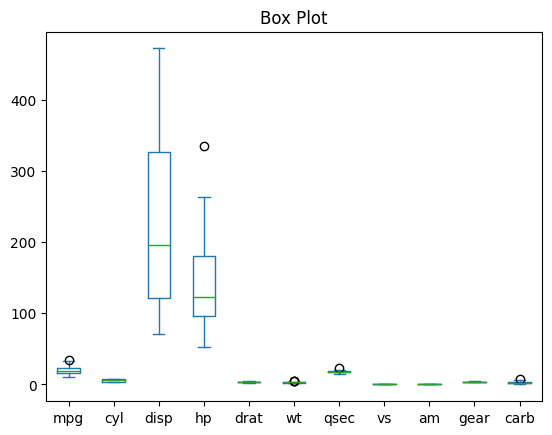

In [38]:
df.plot.box()
# df.boxplot(column='mpg')
plt.title('Box Plot')
plt.show()

In [40]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

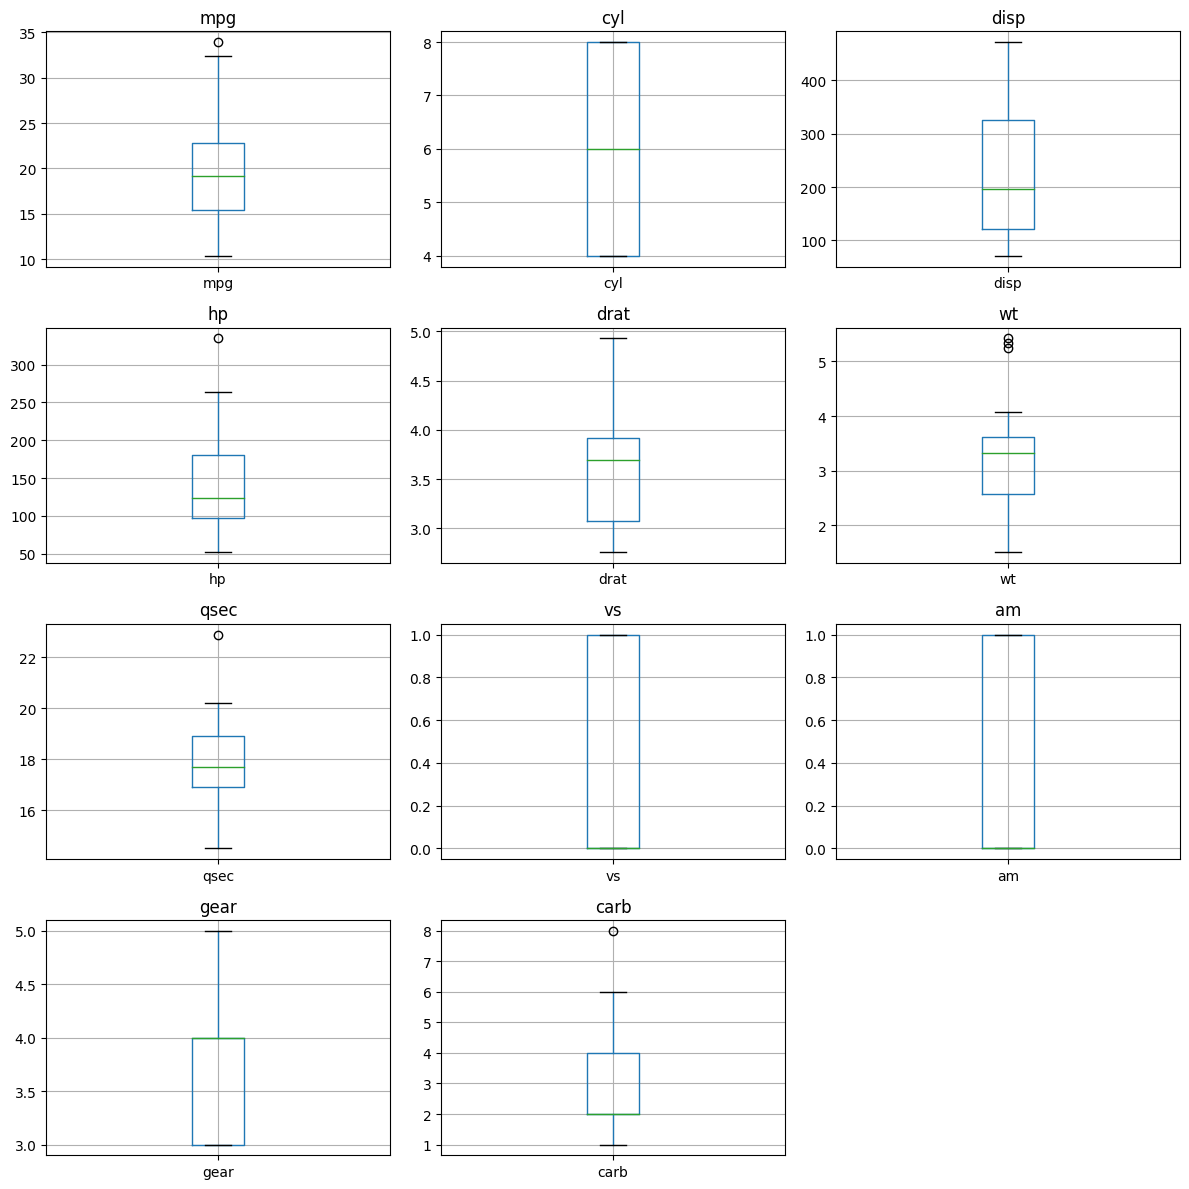

In [39]:
# 데이터프레임의 열 수
num_columns = len(df.columns)

# 그래프의 크기 설정
plt.figure(figsize=(12, 12))

# 각 열에 대한 박스플롯을 그립니다.
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    df.boxplot(column=column)
    plt.title(column)

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()

In [44]:
# 피벗 테이블 생성
pivot_table = df.pivot_table(values='hp', index='cyl', columns='gear', aggfunc='mean', fill_value=0)
print(pivot_table)

gear           3      4      5
cyl                           
4      97.000000   76.0  102.0
6     107.500000  116.5  175.0
8     194.166667    0.0  299.5


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 상관계수 행렬 계산
correlation_matrix = df.corr()
target_variable = 'mpg'
correlation_matrix[target_variable]

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

In [51]:
# 타겟 변수와 상관관계가 높은 변수 선택 (절대값 기준으로 상위 n개 선택)
target_variable = 'mpg'
correlation_threshold = 0.5
correlated_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) >
                                                          correlation_threshold].index.tolist()

# 선택된 변수 출력
print(f"Variables highly correlated with {target_variable}: {correlated_features}")


Variables highly correlated with mpg: ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']


In [55]:
divmod(4,4)

(1, 0)

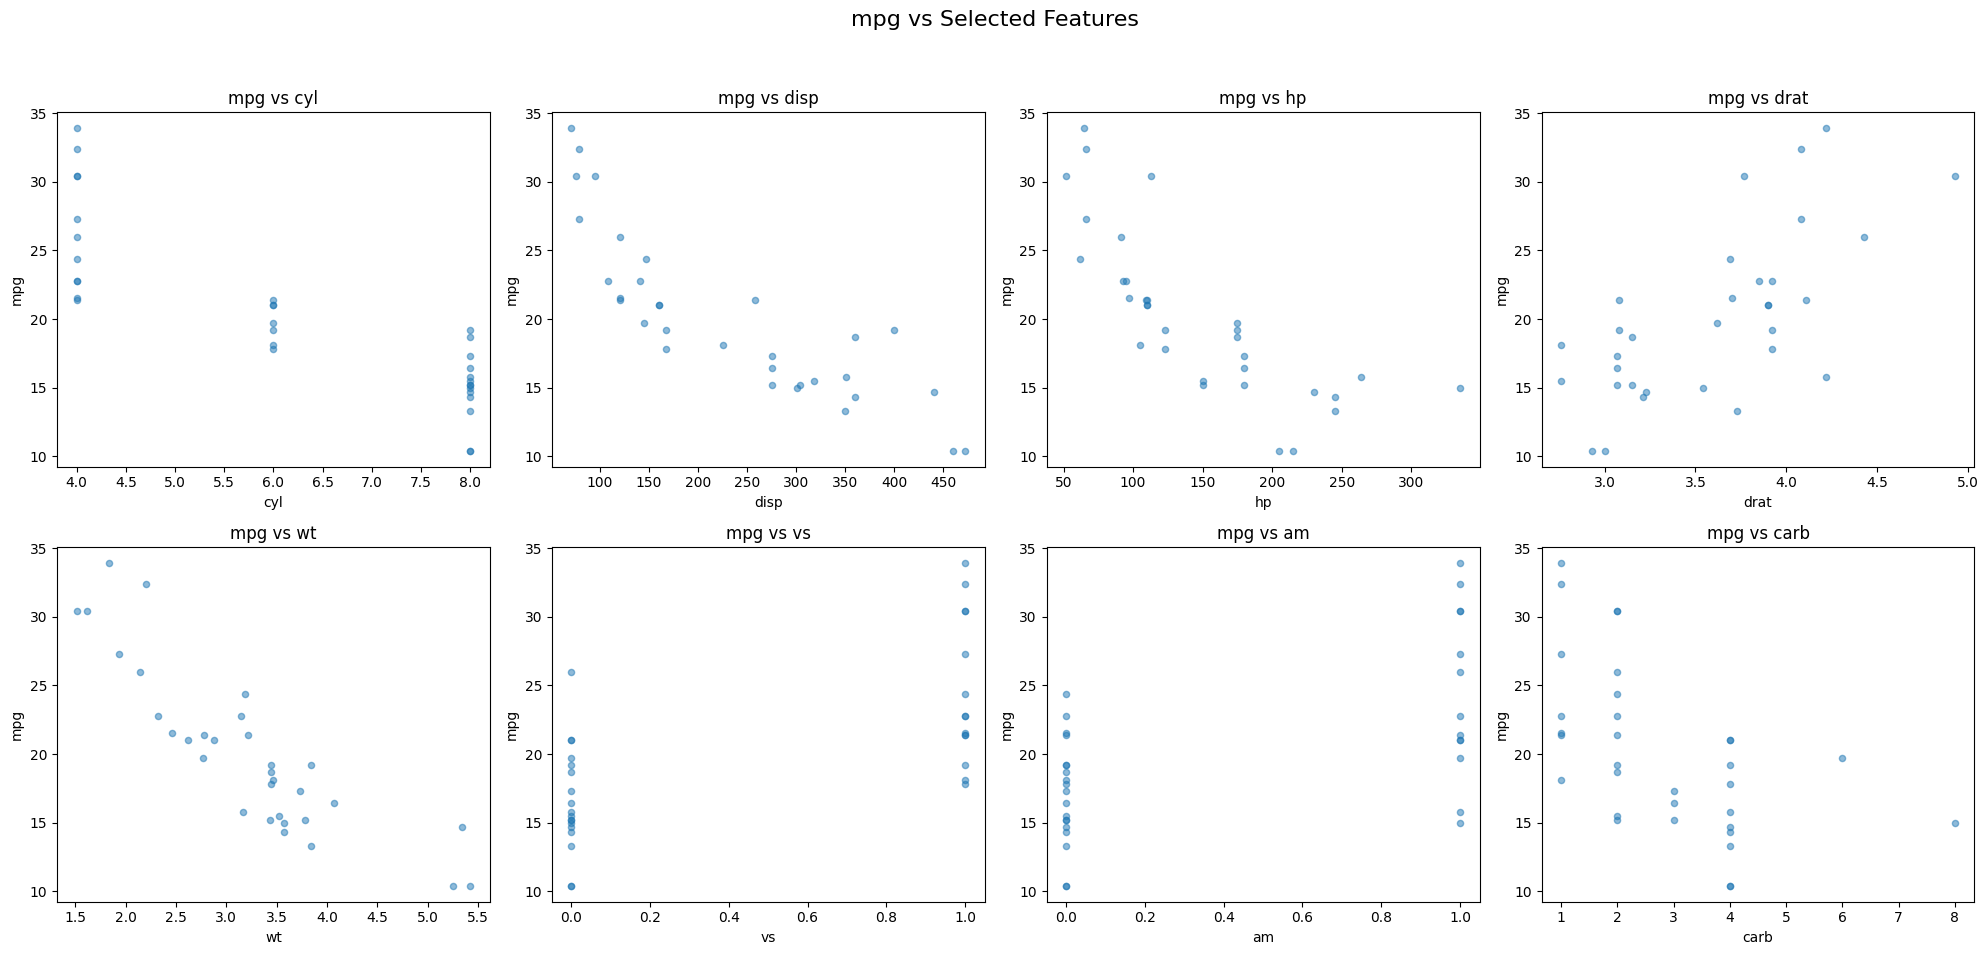

In [56]:
# 분석할 컬럼들
columns = ['cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']
target = 'mpg'

# 2행 4열의 subplot 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# 각 subplot에 산점도 그리기
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 4)
    df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'{target} vs {col}')

# 전체 제목 설정
fig.suptitle(f'{target} vs Selected Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

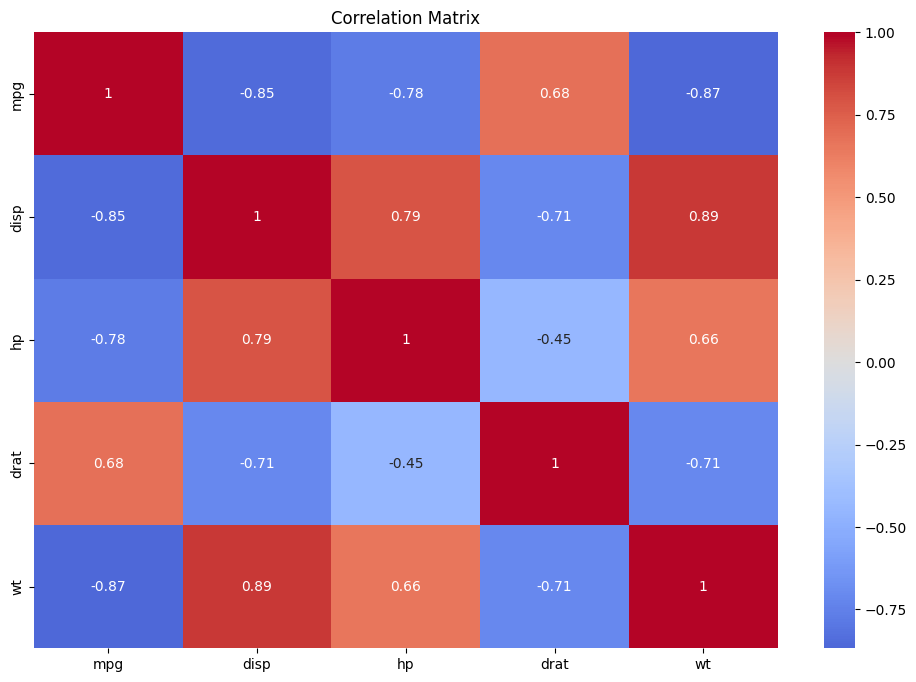

In [ ]:
# 상관계수 행렬 시각화
correlation_matrix = df[[ 'mpg','disp', 'hp', 'drat', 'wt']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler

correlated_features = [ 'mpg','disp', 'hp', 'drat', 'wt']
# 분석용 데이터셋 구축
analysis_df = df[correlated_features]
target_variable = 'mpg'
# 데이터셋 확인
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

                    mpg   disp   hp  drat     wt
Mazda RX4          21.0  160.0  110  3.90  2.620
Mazda RX4 Wag      21.0  160.0  110  3.90  2.875
Datsun 710         22.8  108.0   93  3.85  2.320
Hornet 4 Drive     21.4  258.0  110  3.08  3.215
Hornet Sportabout  18.7  360.0  175  3.15  3.440
       disp        hp      drat        wt   mpg
0 -0.579750 -0.543655  0.576594 -0.620167  21.0
1 -0.579750 -0.543655  0.576594 -0.355382  21.0
2 -1.006026 -0.795570  0.481584 -0.931678  22.8
3  0.223615 -0.543655 -0.981576 -0.002336  21.4
4  1.059772  0.419550 -0.848562  0.231297  18.7


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 8.99
Root Mean Squared Error: 3.0
R-squared: 0.78


누락 데이터('?') 삭제

In [12]:
from google.colab import files

# 파일 업로드 창 열기
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [13]:
import pandas as pd
# file_path = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/auto-mpg.csv'
file_path = 'auto-mpg.csv'
auto_df = pd.read_csv(file_path)
auto_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [14]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [15]:
print(auto_df['horsepower'].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [16]:
# 누락 데이터('?') 삭제
import numpy as np
auto_df['horsepower'].replace('?', np.nan, inplace=True)
print(auto_df['horsepower'].isnull().sum())# '?'을 np.nan으로 변경

auto_df.dropna(subset=['horsepower'], axis=0, inplace=True)       # 누락데이터 행을 삭제
auto_df['horsepower'].isnull().sum()

6


0

In [17]:
auto_df.horsepower = auto_df.horsepower.astype(float)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [19]:
# 직렬화는 파이썬 객체를 바이트 스트림으로 변환하여 파일이나 네트워크를 통해 저장하거나 전송
# 역직렬화는 바이트 스트림을 다시 파이썬 객체로 복원하는 과정
auto_df.to_pickle('auto_df.pkl')
auto_df = pd.read_pickle('auto_df.pkl')
print(auto_df.horsepower.dtype)
auto_df.head()

float64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [20]:
file_path = 'auto-mpg.csv'
auto_df = pd.read_csv(file_path)

In [21]:
idx_1= auto_df[auto_df.horsepower == '?'].index
idx_1
# df.drop(idx_1)

Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [22]:
auto_df = auto_df.drop(idx_1)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [23]:
auto_df.horsepower = auto_df.horsepower.astype(float)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


파생변수 생성

In [24]:
adf = auto_df.copy()

In [25]:
adf = adf[['mpg','cylinders','displacement','horsepower','weight']]
adf.head()

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


In [26]:
# mpg(mile per gallon)를 kpl(kilometer per liter)로 변환 (mpg_to_kpl = 0.425)
mpg_to_kpl = 1.60934 / 3.78541

# mpg 열에 0.425를 곱한 결과를 새로운 열(kpl)에 추가
auto_df['kpl'] = auto_df['mpg'] * mpg_to_kpl

# kpl 열을 소수점 아래 둘째 자리에서 반올림
auto_df['kpl'] = auto_df['kpl'].round(2)
auto_df[['mpg','kpl']].head(3)

,mpg,kpl
0,18.0,7.65
1,15.0,6.38
2,18.0,7.65


데이터 타입 변경

In [27]:
# origin 열의 고유값 확인
print(auto_df['origin'].unique())

# 정수형 데이터를 문자형 데이터로 변환
auto_df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)

print(auto_df['origin'].unique())

[1 3 2]
['USA' 'JAPAN' 'EU']


In [ ]:
# origin 열의 자료형 확인
print(auto_df['origin'].dtypes)
# origin 열의 문자열 자료형을 범주형으로 변환
auto_df['origin'] = auto_df['origin'].astype('category')
print(auto_df['origin'].dtypes)
auto_df.origin.head()

object
category


0    USA
1    USA
2    USA
3    USA
4    USA
Name: origin, dtype: category
Categories (3, object): ['EU', 'JAPAN', 'USA']

In [ ]:
# 범주형을 문자열로 변환
auto_df['origin'] = auto_df['origin'].astype('str')
print(auto_df['origin'].dtypes)

object


Q. horsepower를 3개의 bin으로 나누고 bin_names = ['저출력', '보통출력', '고출력']으로 출력하세요.
(np.histogram() 함수로 3개의 bin으로 나눔)

In [ ]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino,7.23


In [ ]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   car name      392 non-null    object 
 9   kpl           392 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB


In [ ]:
import pandas as pd
import numpy as np

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(auto_df['horsepower'], bins=3)
print(bin_dividers)
print()

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
auto_df['hp_bin'] = pd.cut(x=auto_df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

# horsepower 열, hp_bin 열의 첫 15행을 출력
print(auto_df[['horsepower', 'hp_bin']].head(15))

[ 46.         107.33333333 168.66666667 230.        ]

    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


In [ ]:
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
auto_df.horsepower = auto_df.horsepower / abs(auto_df.horsepower.max())

print(auto_df.horsepower.head())
print()
print(auto_df.horsepower.describe())

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


In [ ]:
mtcars = auto_df.copy()
mtcars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
mcar1 = mtcars.drop(['car name','horsepower'],axis=1)
mcar1.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1


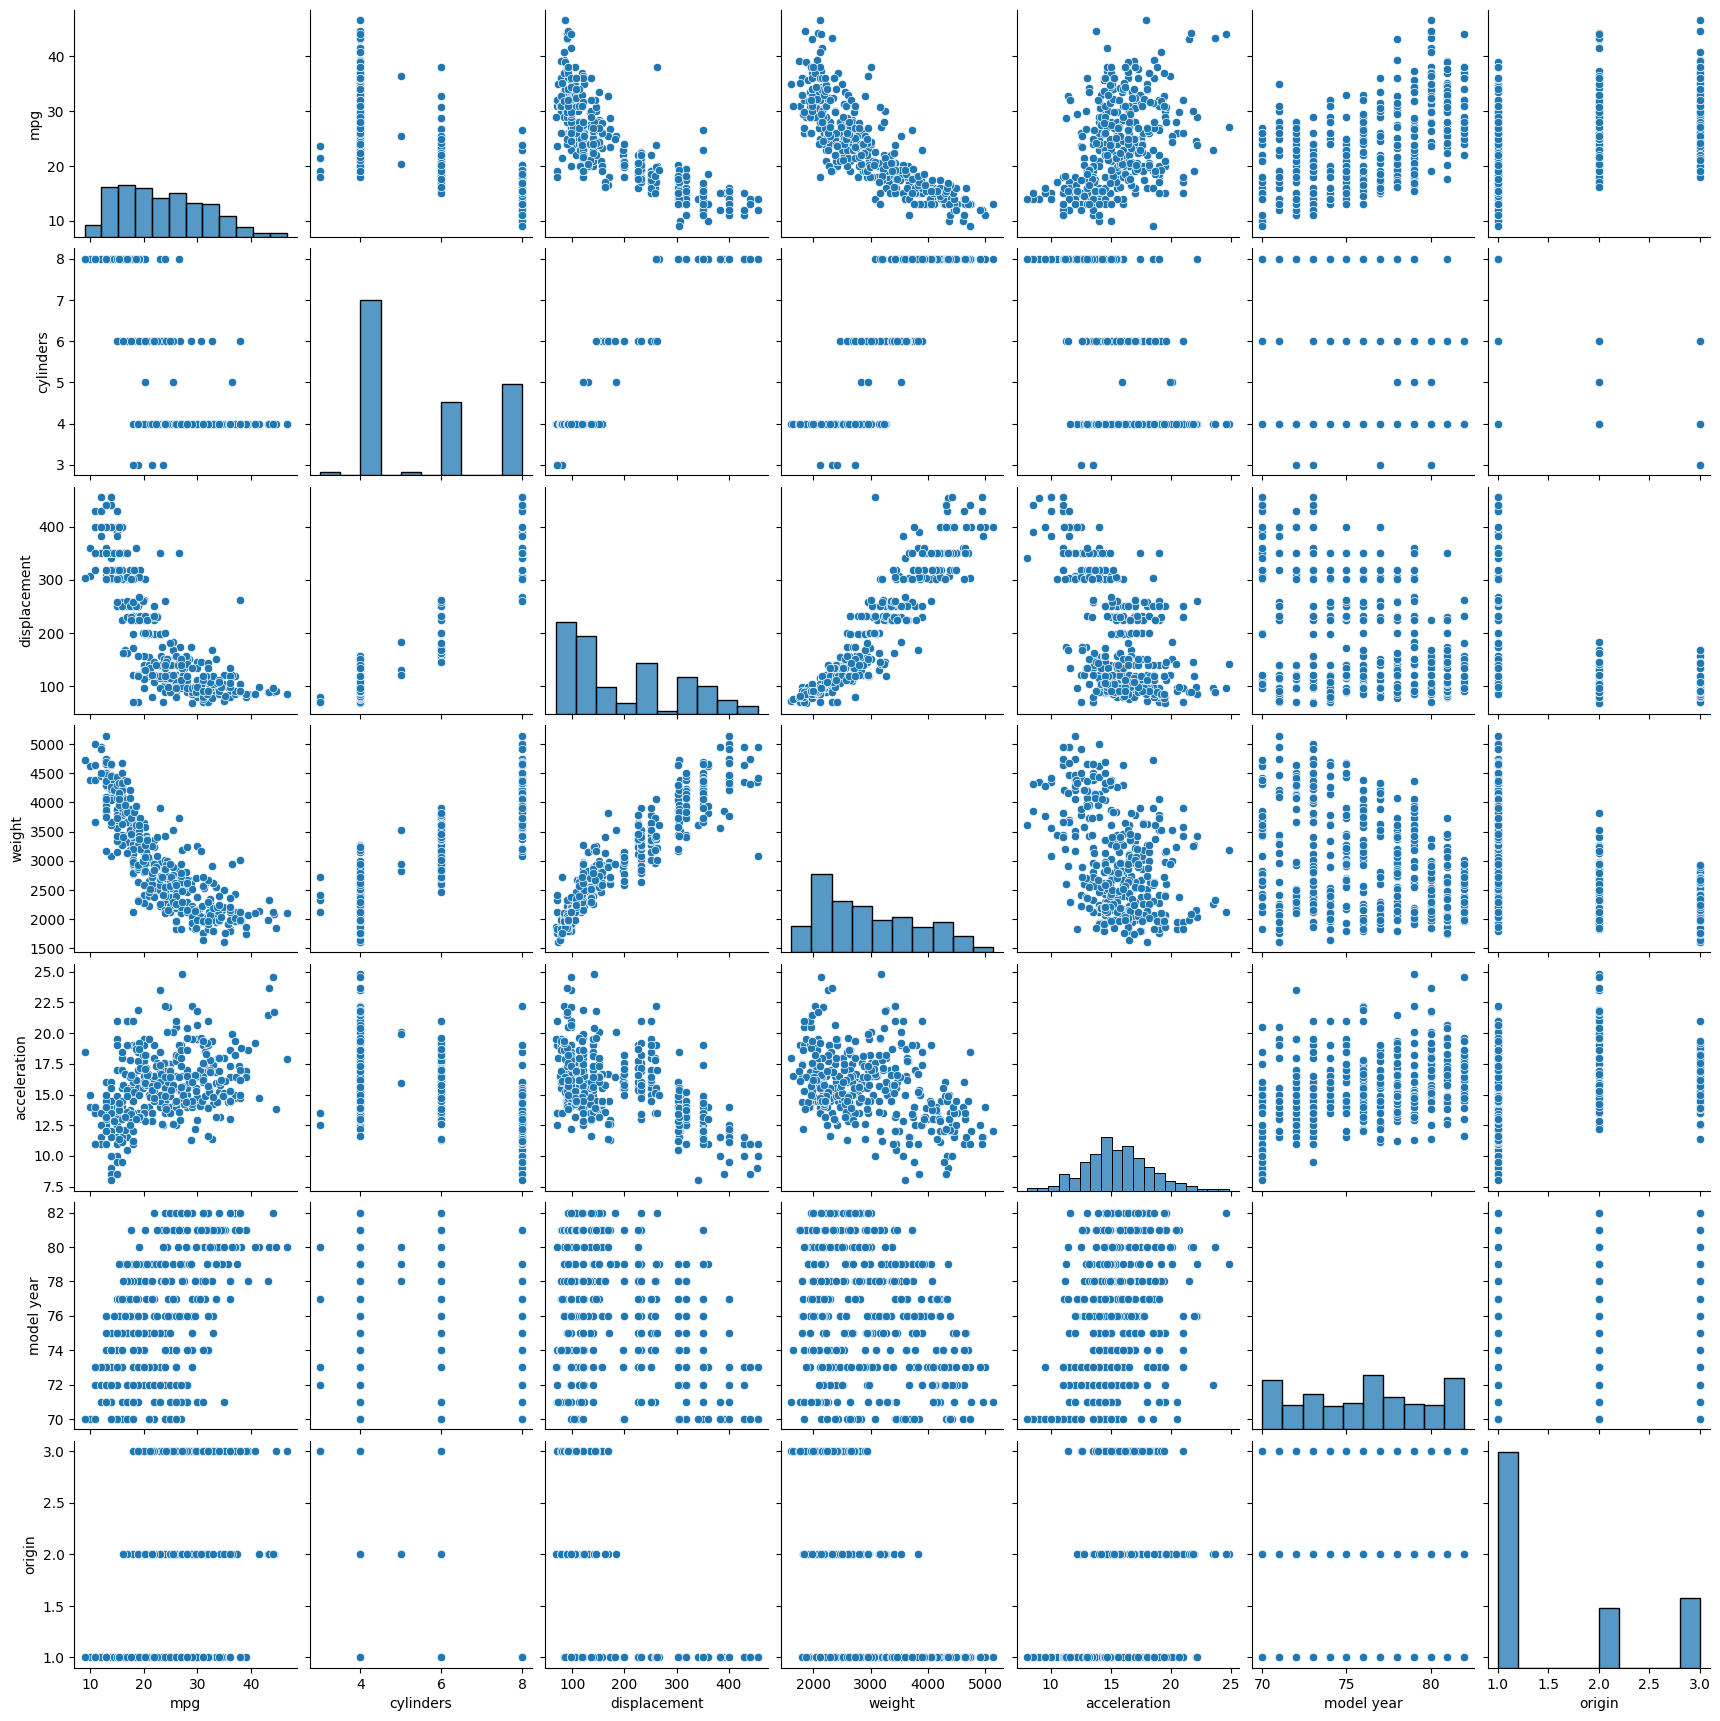

In [ ]:
import seaborn as sns
sns.pairplot(mcar1)

In [ ]:
mcar1.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


Q. mpg와 weight 두 변수를 선택해서 회귀 모델을 생성 및 평가하세요.

In [ ]:
# 최적의 컬럼 선택하여 분석용 데이터 셋 구축 - Feature engineering
mcar2 = mcar1[['mpg','weight']]
mcar2.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


Mean Squared Error: 17.693388269545686
R-squared: 0.6533466675646016


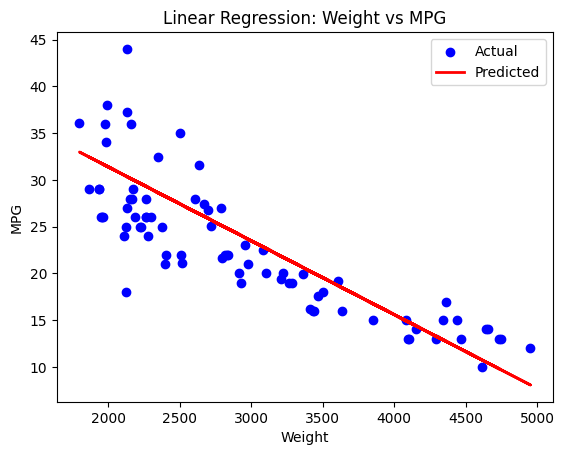

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#  독립 변수 (X)와 종속 변수 (y) 설정
X = mcar2[['weight']]
y = mcar2['mpg']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 회귀선 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Linear Regression: Weight vs MPG')
plt.legend()
plt.show()

Task1_0531. auto-mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Google Colab에서 파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

Saving auto-mpg.csv to auto-mpg.csv


In [ ]:
# 데이터 확인
print(df.head())
print(df.info())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

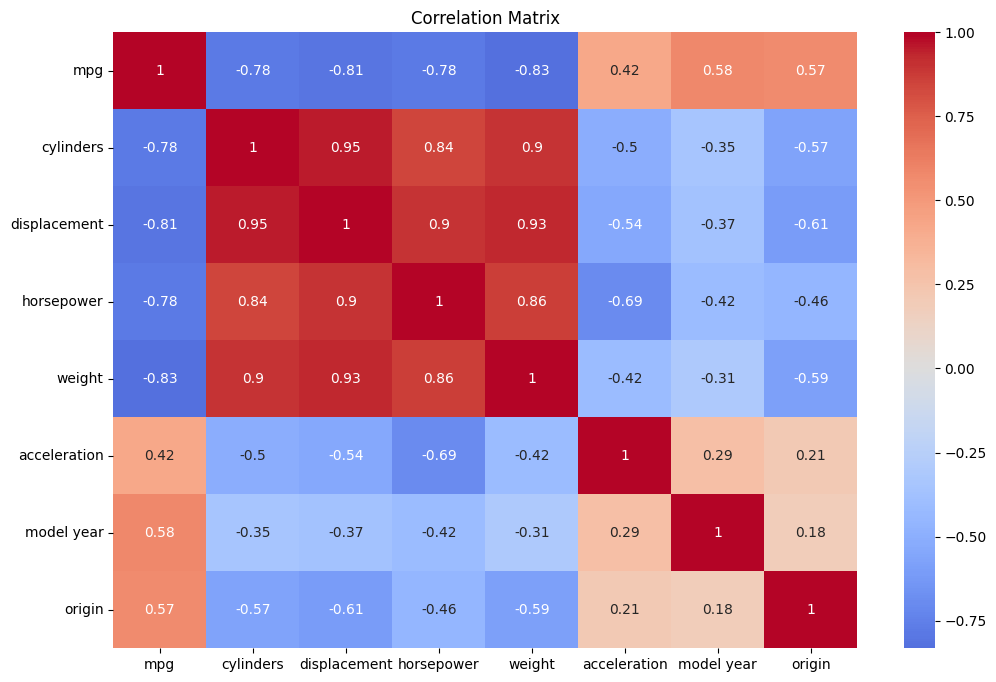

   cylinders  displacement  horsepower    weight  model year    origin  \
0   1.483947      1.077290    0.664133  0.620540   -1.625315 -0.716641   
1   1.483947      1.488732    1.574594  0.843334   -1.625315 -0.716641   
2   1.483947      1.182542    1.184397  0.540382   -1.625315 -0.716641   
3   1.483947      1.048584    1.184397  0.536845   -1.625315 -0.716641   
4   1.483947      1.029447    0.924265  0.555706   -1.625315 -0.716641   

   hp_to_weight   mpg  
0      0.382496  18.0  
1      1.661177  15.0  
2      1.488456  18.0  
3      1.494892  16.0  
4      0.971505  17.0  
Mean Squared Error: 10.139094603469605
Root Mean Squared Error: 3.1841944983731136
R-squared: 0.8013522973313041


In [ ]:
# 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

# 'car name' 열 제거
df = df.drop(columns=['car name'])

# 데이터 타입 변환 및 기초 통계 확인
df = df.astype({'horsepower': 'float64'})
print(df.describe())

# 탐색적 데이터 분석
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 변수 선정 (상관계수 기반)
target_variable = 'mpg'
correlation_threshold = 0.5
correlated_features = df.corr()[target_variable][abs(df.corr()[target_variable]) > correlation_threshold].index.tolist()

# 파생 변수 생성: 예를 들어, 중량 대비 마력비 (horsepower-to-weight ratio)
df['hp_to_weight'] = df['horsepower'] / df['weight']

# 분석용 데이터셋 구축
selected_features = correlated_features + ['hp_to_weight']
analysis_df = df[selected_features]

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")